<a href="https://colab.research.google.com/github/paviayyala/AIML-Lab/blob/main/Week2_ML_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Week 2 — Machine Learning Basics (Google Colab Notebook)
Five beginner-friendly, hands-on programs with **explanations and comments** that connect to Week 1 (Statistics).

**What you'll learn this week:**
- Day 6: **Feature Scaling & Preprocessing** (Standardization, Min-Max, missing values)
- Day 7: **Naïve Bayes Classifier** (GaussianNB on Iris)
- Day 8: **Logistic Regression** (binary classification)
- Day 9: **A/B Testing Simulation** (proportion z-test) + interpretation
- Day 10: **Linear & Multiple Regression** (from simple line to multi-feature)

> Tip: Run each cell in order. Modify parameters and re-run to build intuition.


In [ ]:

# Common imports used across multiple days
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ML tools (scikit-learn) — available by default on Google Colab
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import make_classification, make_regression

# We will create each figure separately (one chart per plot) and avoid setting explicit colors.



## Day 6 — Feature Scaling & Preprocessing
We demonstrate **Standardization**, **Min-Max scaling**, and **handling missing values**.  
This connects to Week 1 (descriptive stats & distributions): scaling aligns feature ranges, improving model stability.


Head with NaNs:
   hours_studied  assignments_done  final_score
0       7.739560              17.0    95.183606
1       4.388784               4.0    50.656051
2       8.585979              16.0    98.382323
3       6.973680               0.0    52.732138
4       0.941773              16.0    57.501566


/tmp/ipython-input-1117746082.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X_imp[:,0], X_imp[:,1]], labels=["hours_studied (imp)", "assignments_done (imp)"])


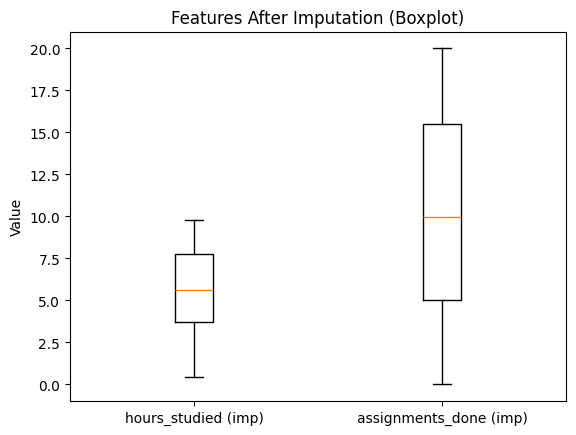

/tmp/ipython-input-1117746082.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X_std[:,0], X_std[:,1]], labels=["hours_studied (std)", "assignments_done (std)"])


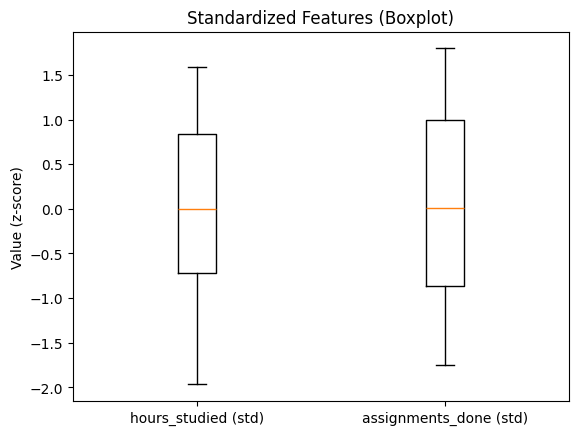

/tmp/ipython-input-1117746082.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X_mm[:,0], X_mm[:,1]], labels=["hours_studied (min-max)", "assignments_done (min-max)"])


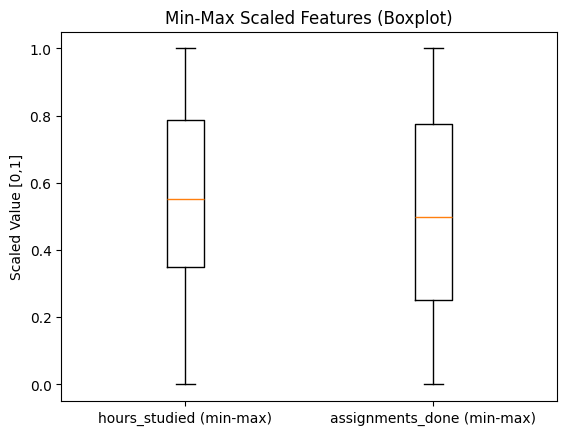

R2 (raw): 0.898
R2 (standardized): 0.898


In [ ]:

# --- Day 6: Feature Scaling & Preprocessing ---
# Synthetic dataset: 'hours_studied' (0..10), 'assignments_done' (0..20), 'final_score' (0..100)
rng = np.random.default_rng(42)
n = 50
hours = rng.uniform(0, 10, size=n)
assignments = rng.integers(0, 21, size=n)
score = 5*hours + 2*assignments + rng.normal(0, 5, size=n) + 20  # linear-ish target

df = pd.DataFrame({
    "hours_studied": hours,
    "assignments_done": assignments.astype(float),
    "final_score": score
})

# Introduce some missing values
df.loc[rng.choice(n, 5, replace=False), "assignments_done"] = np.nan
df.loc[rng.choice(n, 3, replace=False), "hours_studied"] = np.nan

print("Head with NaNs:")
print(df.head())

# Separate features and target
X = df[["hours_studied", "assignments_done"]].values
y = df["final_score"].values

# Impute missing values (mean)
imputer = SimpleImputer(strategy="mean")
X_imp = imputer.fit_transform(X)

# Standardization
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X_imp)

# Min-Max Scaling
scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X_imp)

# Visualize distributions before/after (boxplots)
plt.figure()
plt.boxplot([X_imp[:,0], X_imp[:,1]], labels=["hours_studied (imp)", "assignments_done (imp)"])
plt.title("Features After Imputation (Boxplot)")
plt.ylabel("Value")
plt.show()

plt.figure()
plt.boxplot([X_std[:,0], X_std[:,1]], labels=["hours_studied (std)", "assignments_done (std)"])
plt.title("Standardized Features (Boxplot)")
plt.ylabel("Value (z-score)")
plt.show()

plt.figure()
plt.boxplot([X_mm[:,0], X_mm[:,1]], labels=["hours_studied (min-max)", "assignments_done (min-max)"])
plt.title("Min-Max Scaled Features (Boxplot)")
plt.ylabel("Scaled Value [0,1]")
plt.show()

# Optional: quick linear regression to see effect of preprocessing on performance (same target)
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.25, random_state=0)
X_train_std, X_test_std, = scaler_std.fit_transform(X_train), scaler_std.transform(X_test)

lr_raw = LinearRegression().fit(X_train, y_train)
lr_std = LinearRegression().fit(X_train_std, y_train)

pred_raw = lr_raw.predict(X_test)
pred_std = lr_std.predict(X_test_std)

print("R2 (raw):", round(r2_score(y_test, pred_raw), 3))
print("R2 (standardized):", round(r2_score(y_test, pred_std), 3))



## Day 7 — Naïve Bayes Classifier (GaussianNB)
We train **Gaussian Naïve Bayes** on the classic **Iris** dataset.  
Connects to Week 1 (conditional probability & Bayes’ theorem).


Accuracy: 0.974
Confusion Matrix:
 [[13  0  0]
 [ 0 13  0]
 [ 0  1 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



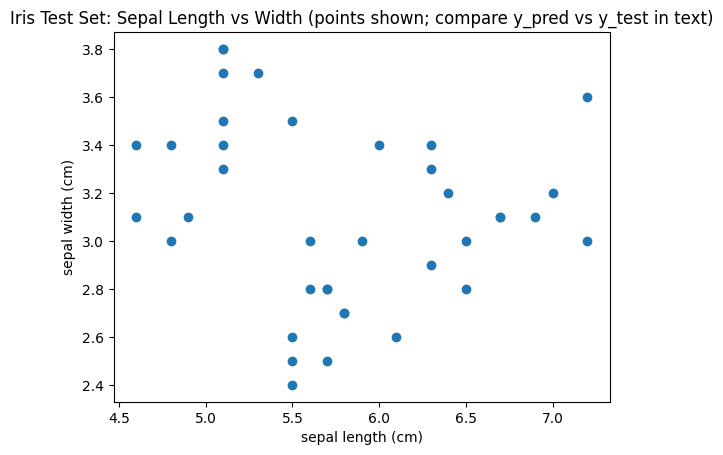

In [ ]:

# --- Day 7: Naïve Bayes on Iris ---
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred = model_nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", round(acc, 3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# Simple visualization: sepal length vs width scatter for test set colored by prediction vs truth (single chart constraint)
plt.figure()
plt.scatter(X_test[:,0], X_test[:,1])
plt.title("Iris Test Set: Sepal Length vs Width (points shown; compare y_pred vs y_test in text)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()



## Day 8 — Logistic Regression (Binary Classification)
We use a synthetic binary dataset to demonstrate **logistic regression** and decision probability outputs.  
Connects to Week 1 (binomial distribution and classification vs regression).


Accuracy: 0.992
Confusion Matrix:
 [[62  1]
 [ 0 62]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.98      1.00      0.99        62

    accuracy                           0.99       125
   macro avg       0.99      0.99      0.99       125
weighted avg       0.99      0.99      0.99       125



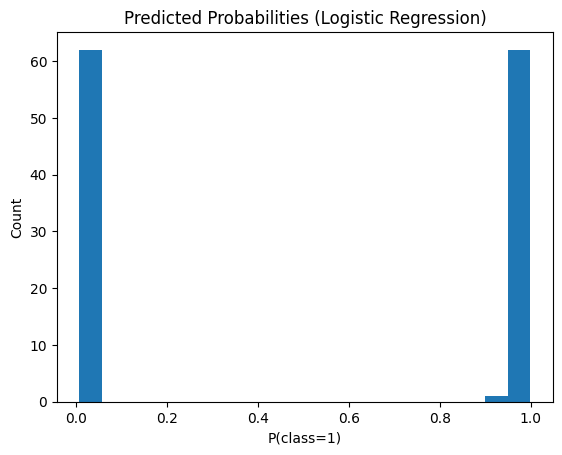

In [ ]:

# --- Day 8: Logistic Regression (Binary) ---
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=1.5, random_state=7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:,1]

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize probability histogram
plt.figure()
plt.hist(y_prob, bins=20)
plt.title("Predicted Probabilities (Logistic Regression)")
plt.xlabel("P(class=1)")
plt.ylabel("Count")
plt.show()



## Day 9 — A/B Testing (Proportion Z-Test)
We simulate two variants (A vs B) with different **conversion rates** and perform a **two-proportion z-test**.  
Connects to Week 1 (hypothesis testing).


Conversions A: 108/1000 -> 0.108
Conversions B: 139/1000 -> 0.139
z-statistic: 2.107
p-value: 0.03513


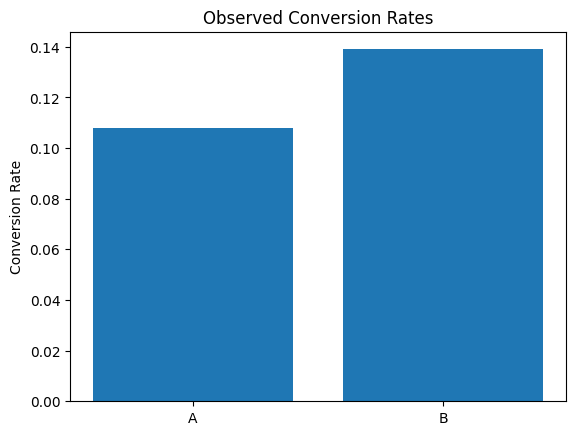

Result: Statistically significant difference at α=0.05.


In [ ]:

# --- Day 9: A/B Testing (Two-Proportion Z-Test) ---
# Simulate conversions
rng = np.random.default_rng(10)
n_A, n_B = 1000, 1000
p_A, p_B = 0.10, 0.13  # true conversion rates

conv_A = rng.binomial(1, p_A, size=n_A)
conv_B = rng.binomial(1, p_B, size=n_B)

x_A, x_B = conv_A.sum(), conv_B.sum()
pA_hat, pB_hat = x_A/n_A, x_B/n_B

# Pooled proportion
p_pool = (x_A + x_B) / (n_A + n_B)
# Standard error
se = np.sqrt(p_pool*(1-p_pool)*(1/n_A + 1/n_B))
# z-statistic
z = (pB_hat - pA_hat) / se
# Two-tailed p-value (using normal approx)
from math import erf, sqrt
def norm_cdf(z):
    return 0.5 * (1 + erf(z / sqrt(2)))
p_value = 2 * (1 - norm_cdf(abs(z)))

print(f"Conversions A: {x_A}/{n_A} -> {pA_hat:.3f}")
print(f"Conversions B: {x_B}/{n_B} -> {pB_hat:.3f}")
print("z-statistic:", round(z, 3))
print("p-value:", round(p_value, 5))

# Visualize conversion rates
plt.figure()
plt.bar(["A","B"], [pA_hat, pB_hat])
plt.title("Observed Conversion Rates")
plt.ylabel("Conversion Rate")
plt.show()

# Interpretation helper
alpha = 0.05
if p_value < alpha:
    print("Result: Statistically significant difference at α=0.05.")
else:
    print("Result: No statistically significant difference at α=0.05.")



## Day 10 — Linear & Multiple Regression
We start with **simple linear regression** (one feature) and then **multiple regression** (many features).  
Connects to Week 1 (correlation & regression).

- Simple example: `study_hours → exam_score`
- Multiple example: synthetic data via `make_regression`


Simple Linear Regression
Coef (slope): 7.839 | Intercept: 21.73
MSE: 26.53 | R2: 0.964


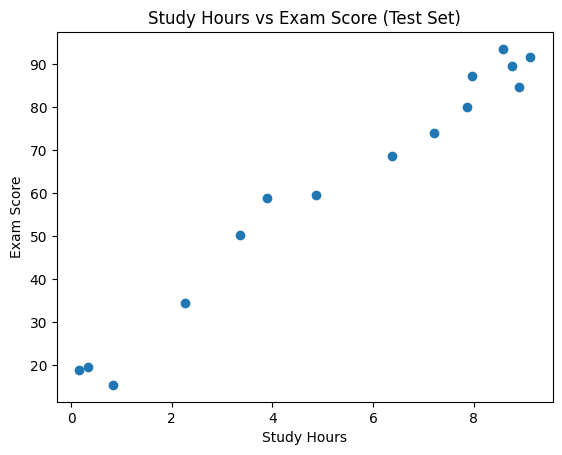


Multiple Linear Regression
Coefficients: [11.354 34.522  4.248 27.276]
Intercept: 0.79
MSE: 135.606 | R2: 0.937


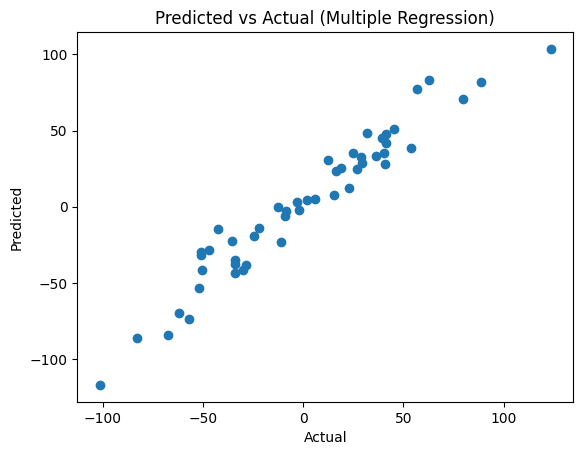

In [ ]:

# --- Day 10: Linear & Multiple Regression ---
# Simple Linear Regression (study_hours -> exam_score)
rng = np.random.default_rng(0)
study_hours = rng.uniform(0, 10, 60)
exam_score = 8*study_hours + rng.normal(0, 5, 60) + 20

X = study_hours.reshape(-1,1)
y = exam_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

linreg = LinearRegression().fit(X_train, y_train)
pred = linreg.predict(X_test)

print("Simple Linear Regression")
print("Coef (slope):", round(linreg.coef_[0], 3), "| Intercept:", round(linreg.intercept_, 3))
print("MSE:", round(mean_squared_error(y_test, pred), 3), "| R2:", round(r2_score(y_test, pred), 3))

plt.figure()
plt.scatter(X_test, y_test)
plt.title("Study Hours vs Exam Score (Test Set)")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

# Multiple Linear Regression (synthetic)
X_multi, y_multi = make_regression(n_samples=200, n_features=4, noise=10.0, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.25, random_state=42)

mlr = LinearRegression().fit(X_train, y_train)
pred_m = mlr.predict(X_test)

print("\nMultiple Linear Regression")
print("Coefficients:", np.round(mlr.coef_, 3))
print("Intercept:", round(mlr.intercept_, 3))
print("MSE:", round(mean_squared_error(y_test, pred_m), 3), "| R2:", round(r2_score(y_test, pred_m), 3))

# Visualize: predicted vs actual (scatter, single chart)
plt.figure()
plt.scatter(y_test, pred_m)
plt.title("Predicted vs Actual (Multiple Regression)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()



---
### Practice Exercises
1. **Day 6:** Try `strategy='median'` in `SimpleImputer`. Compare standardized vs min-max scaled performance.
2. **Day 7:** Swap `GaussianNB` for `LogisticRegression` on Iris. Which performs better?
3. **Day 8:** Reduce `class_sep` to make the problem harder. How do accuracy and probability histogram change?
4. **Day 9:** Decrease the difference in conversion rates (e.g., 0.10 vs 0.11). Is it still significant?
5. **Day 10:** Add one irrelevant feature to the multiple regression. How does R² change?

*Generated on:* 2025-10-02 11:07:47
